In [ ]:
#------------------------------------------------->Differentiated Thyroid Cancer Recurrence<-------------------------------------------------------------
#Thyroid cancer is a growth of cells that starts in the thyroid that is a butterfly-shaped gland located at the base of the neck.While thyroid cancer mortality remains low, the risk of recurrence is a significant concern.
#In this project, we delve into a dataset encapsulating various metrics from reccuring thyroid cancer patients, including age, gender,thyroid function etc.
#-------------------------------------------------------------->Goal<------------------------------------------------------------------------------------
#Our goal is to develop a predictive model capable of accurately identifying individuals with reccuring thyroid cancer. Given the grave implications of missing a positive diagnosis, 
#our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

In [ ]:
#----------------------------------------------------------->Objectives<-------------------------------------------------------------------------------
#1.Explore the dataset
#2.Conduct Extensive Exploratory Data Analysis (EDA)
#3.Preprocessing steps:
#a)Transform skewed features to achieve normal-like distributions.
#4.Model building-Implement and tune classification models including KNN,Decision Trees, and Random Forest.
#5.Evaluate and Compare Model Performance.

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importing csv file-->required dataset
#df is the required dataset---->reading dataset
df=pd.read_csv(R"C:\Users\aditi pandit\Downloads\thyroid-final.csv")
df #printing dataset

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0
1,34,1,0,1,0,1,2,0,1,1,1,1,1,1,1,2,0
2,30,1,0,0,0,1,3,0,1,1,1,1,1,1,1,2,0
3,62,1,0,0,0,1,3,0,1,1,1,1,1,1,1,2,0
4,62,1,0,0,0,1,2,0,1,0,1,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,1,1,1,1,3,1,2,1,3,7,2,2,3,4,1
379,81,0,1,0,1,1,2,2,2,0,3,7,2,2,3,3,1
380,72,0,1,1,0,1,2,4,2,0,3,7,2,2,3,3,1
381,61,0,1,1,1,2,2,2,4,0,3,7,2,1,5,3,1


In [ ]:
#Notations used in Dataset
import pandas as pd
dataframe = pd.read_excel(R"C:\Users\divya\Desktop\DataSetNotation.csv.xlsx")
dataframe

In [3]:
#printing first five elements of dataset
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0
1,34,1,0,1,0,1,2,0,1,1,1,1,1,1,1,2,0
2,30,1,0,0,0,1,3,0,1,1,1,1,1,1,1,2,0
3,62,1,0,0,0,1,3,0,1,1,1,1,1,1,1,2,0
4,62,1,0,0,0,1,2,0,1,0,1,1,1,1,1,2,0


In [4]:
#printing last five elements of dataset
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,0,1,1,1,1,3,1,2,1,3,7,2,2,3,4,1
379,81,0,1,0,1,1,2,2,2,0,3,7,2,2,3,3,1
380,72,0,1,1,0,1,2,4,2,0,3,7,2,2,3,3,1
381,61,0,1,1,1,2,2,2,4,0,3,7,2,1,5,3,1
382,67,0,1,0,0,1,2,4,2,0,3,7,2,1,5,3,1


In [5]:
#printing the nos_of_rows and nos_of_col of the dataset
df.shape

(383, 17)

In [6]:
# Displaying  concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int64
 2   Smoking               383 non-null    int64
 3   Hx Smoking            383 non-null    int64
 4   Hx Radiothreapy       383 non-null    int64
 5   Thyroid Function      383 non-null    int64
 6   Physical Examination  383 non-null    int64
 7   Adenopathy            383 non-null    int64
 8   Pathology             383 non-null    int64
 9   Focality              383 non-null    int64
 10  Risk                  383 non-null    int64
 11  T                     383 non-null    int64
 12  N                     383 non-null    int64
 13  M                     383 non-null    int64
 14  Stage                 383 non-null    int64
 15  Response              383 non-null    int64
 16  Recurred

In [ ]:
#----------------------------------------------------------------->Inferences<-----------------------------------------------------------------------
#Number of Entries: The dataset consists of 383 entries, ranging from index 0 to 382.
#Columns: There are 17 columns in the dataset corresponding to various attributes of the patients and results of tests.
#Data Types:All the columns (17 out of 17) are of the int64 data type(have been converted to numeric type for better and easier analysation)



In [7]:
#-------------------------------------------------------------->starting<--------------------------------------------------------------------------------
#Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0
Gender,383.0,0.814621,0.389113,0.0,1.0,1.0,1.0,1.0
Smoking,383.0,0.127937,0.334457,0.0,0.0,0.0,0.0,1.0
Hx Smoking,383.0,0.073107,0.260653,0.0,0.0,0.0,0.0,1.0
Hx Radiothreapy,383.0,0.018277,0.134126,0.0,0.0,0.0,0.0,1.0
Thyroid Function,383.0,1.300261,0.889835,1.0,1.0,1.0,1.0,5.0
Physical Examination,383.0,2.224543,0.887212,1.0,2.0,2.0,3.0,5.0
Adenopathy,383.0,0.655352,1.280652,0.0,0.0,0.0,1.0,5.0
Pathology,383.0,2.052219,0.636901,1.0,2.0,2.0,2.0,4.0
Focality,383.0,0.644909,0.479167,0.0,0.0,1.0,1.0,1.0


In [ ]:
#Numerical features:
#Age:The average age of the patients is approximately 40.8 years, with the youngest being 15 and the oldest 82 years.


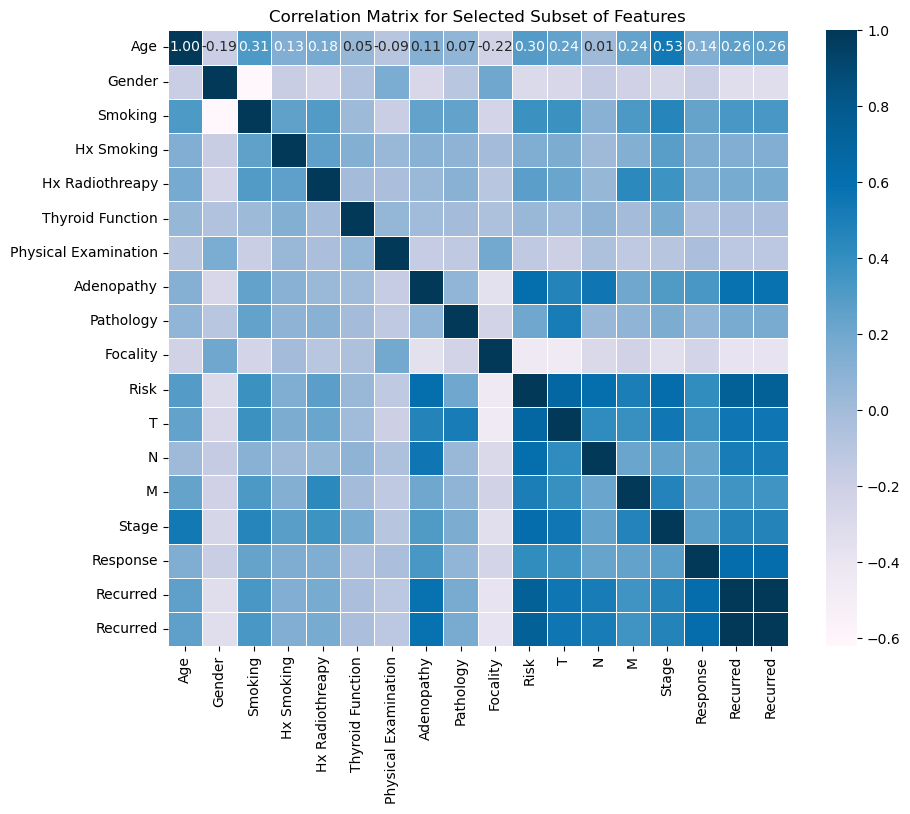

In [8]:
#----------------------------------------------------->Exploratory Data Analysis (EDA)<---------------------------------------------------------------------
# EDA is a powerful approach for understanding and summarizing data sets. 
#----------------------------------------------------->Correlation<--------------------------------------------------------------------------------------
#Correlations allows data analysts to discover relationships and dependencies between variables.


selected_subset = ['Age','Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred']


df_subset = pd.get_dummies(df[selected_subset + ['Recurred']], drop_first=True)


correlation_matrix_subset = df_subset.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='PuBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Selected Subset of Features')
plt.show()

In [11]:
#Displaying the columns of the dataset
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [15]:
continous_features=['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
list(enumerate(continous_features))

[(0, 'Age'),
 (1, 'Gender'),
 (2, 'Smoking'),
 (3, 'Hx Smoking'),
 (4, 'Hx Radiothreapy'),
 (5, 'Thyroid Function'),
 (6, 'Physical Examination'),
 (7, 'Adenopathy'),
 (8, 'Pathology'),
 (9, 'Focality'),
 (10, 'Risk'),
 (11, 'T'),
 (12, 'N'),
 (13, 'M'),
 (14, 'Stage'),
 (15, 'Response'),
 (16, 'Recurred')]

In [17]:
# Define continuous_features as a list of continuous column names
continuous_features = ['column1', 'column2', 'column3']  # Replace with your actual continuous column names

# Filter out categorical features by finding the difference between all columns and continuous features
categorical_features = df.columns.difference(continuous_features)

# Select only the categorical columns from the DataFrame
df_categorical = df[categorical_features]

In [37]:
# Define the features (X) and the output labels (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

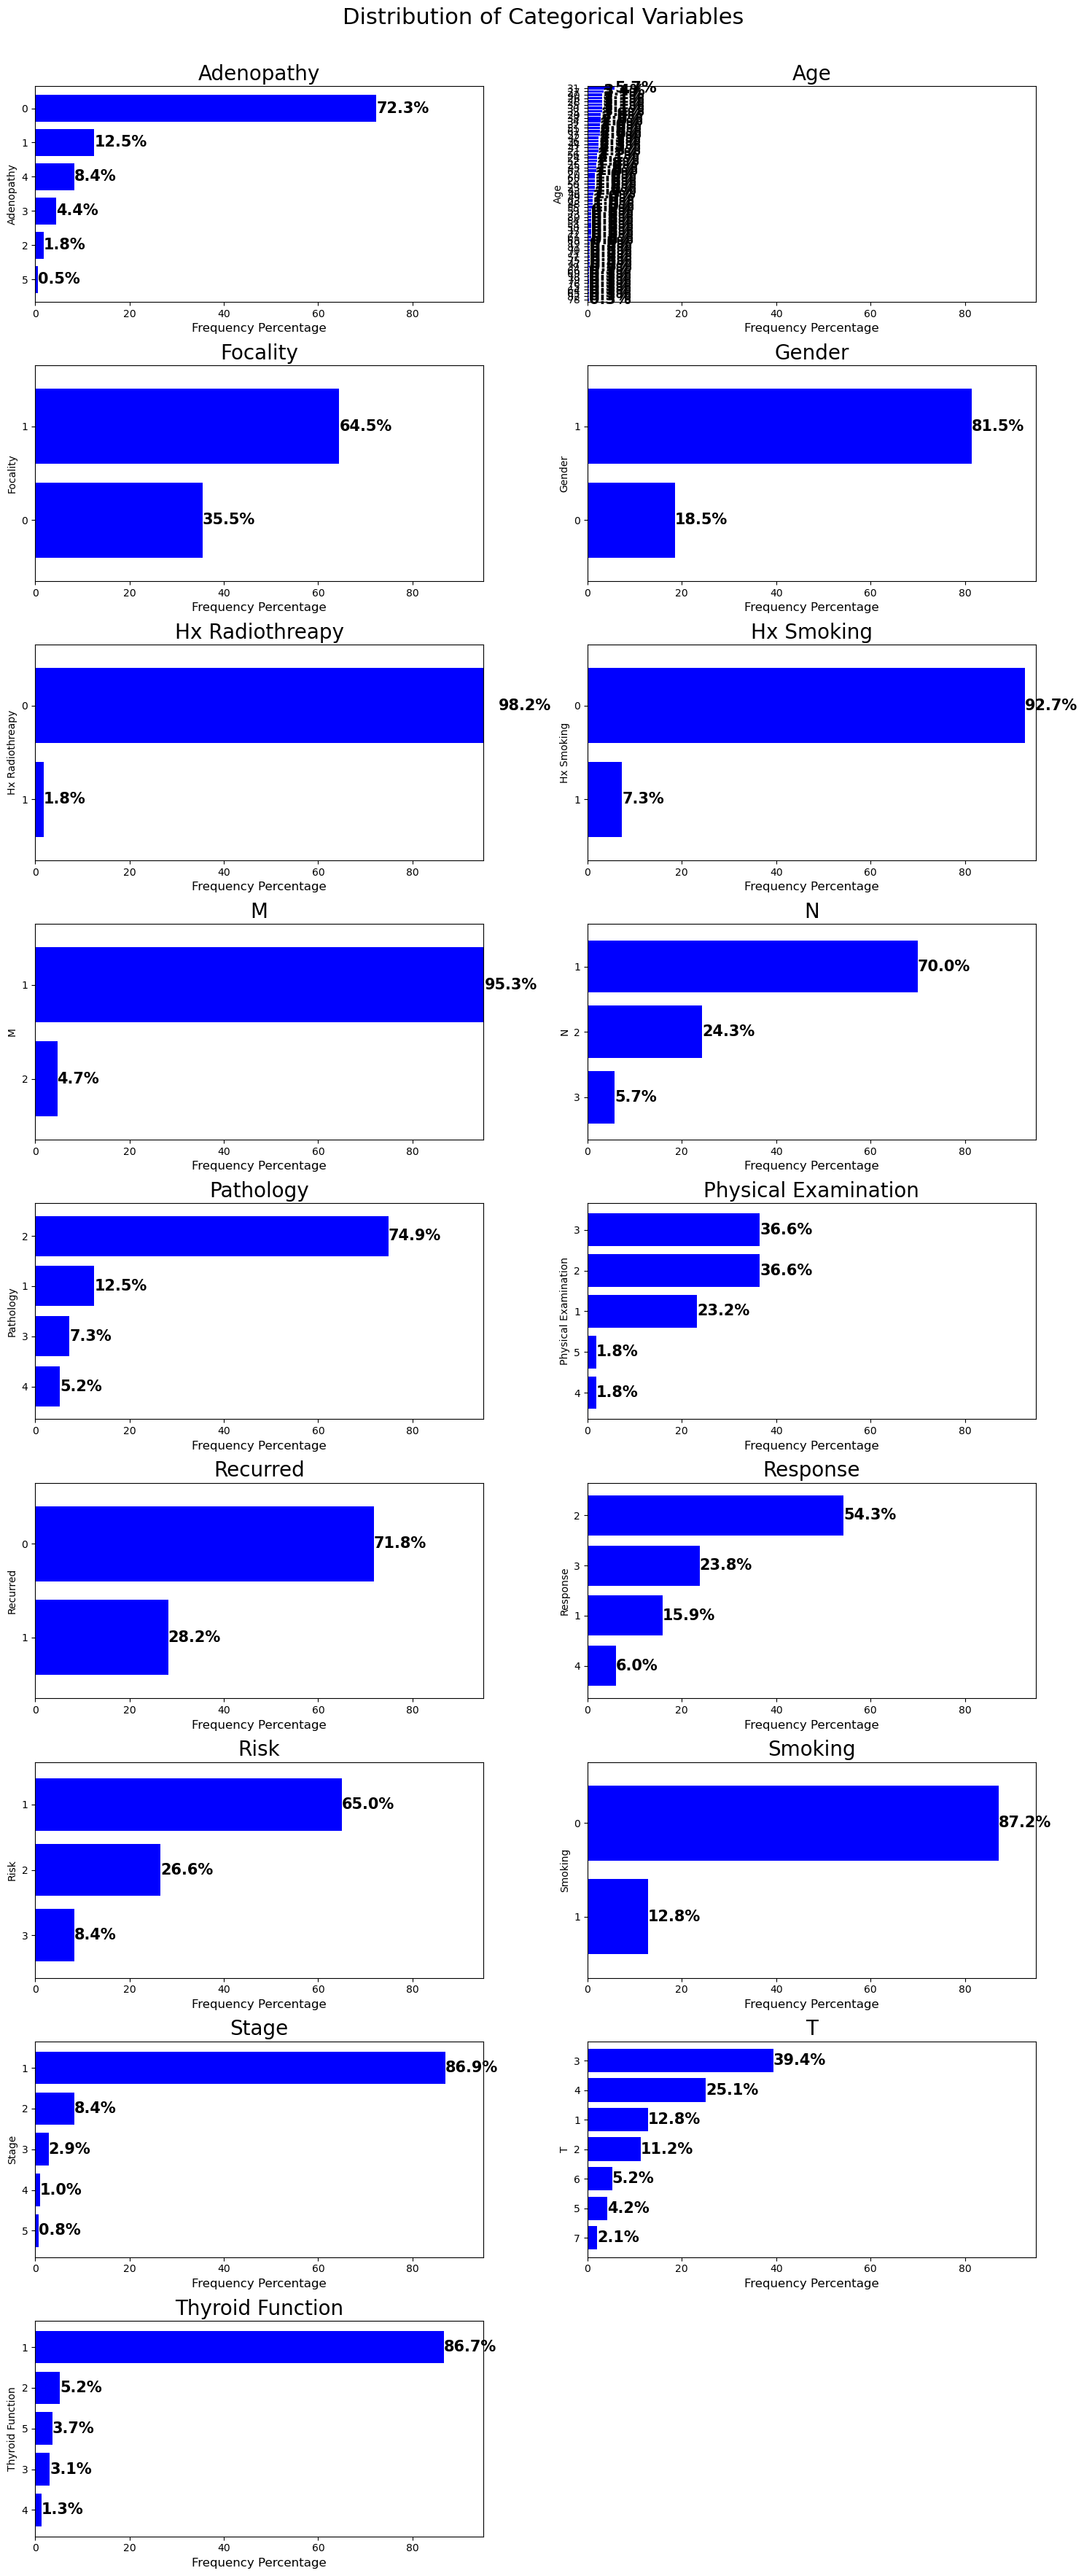

In [20]:
#Graphs showing distribution of categorial values
import matplotlib.pyplot as plt

# Set up the subplot grid based on the number of categorical features
num_categorical = len(categorical_features)
nrows = (num_categorical + 1) // 2  # Calculate the number of rows needed
ncols = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))

# Flatten the ax array for easier indexing, in case of a single row or column
if nrows * ncols > 1:
    ax = ax.flatten()
else:
    ax = [ax]  # If only one subplot, wrap it in a list for consistent indexing

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(categorical_features):
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[i], width=0.8, color='blue')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[i].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[i].set_xlim([0, 95])
    ax[i].set_xlabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=20)

# Turn off the remaining empty subplots, if any
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [ ]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != ''Recurred'']

ax shape: (2, 4)


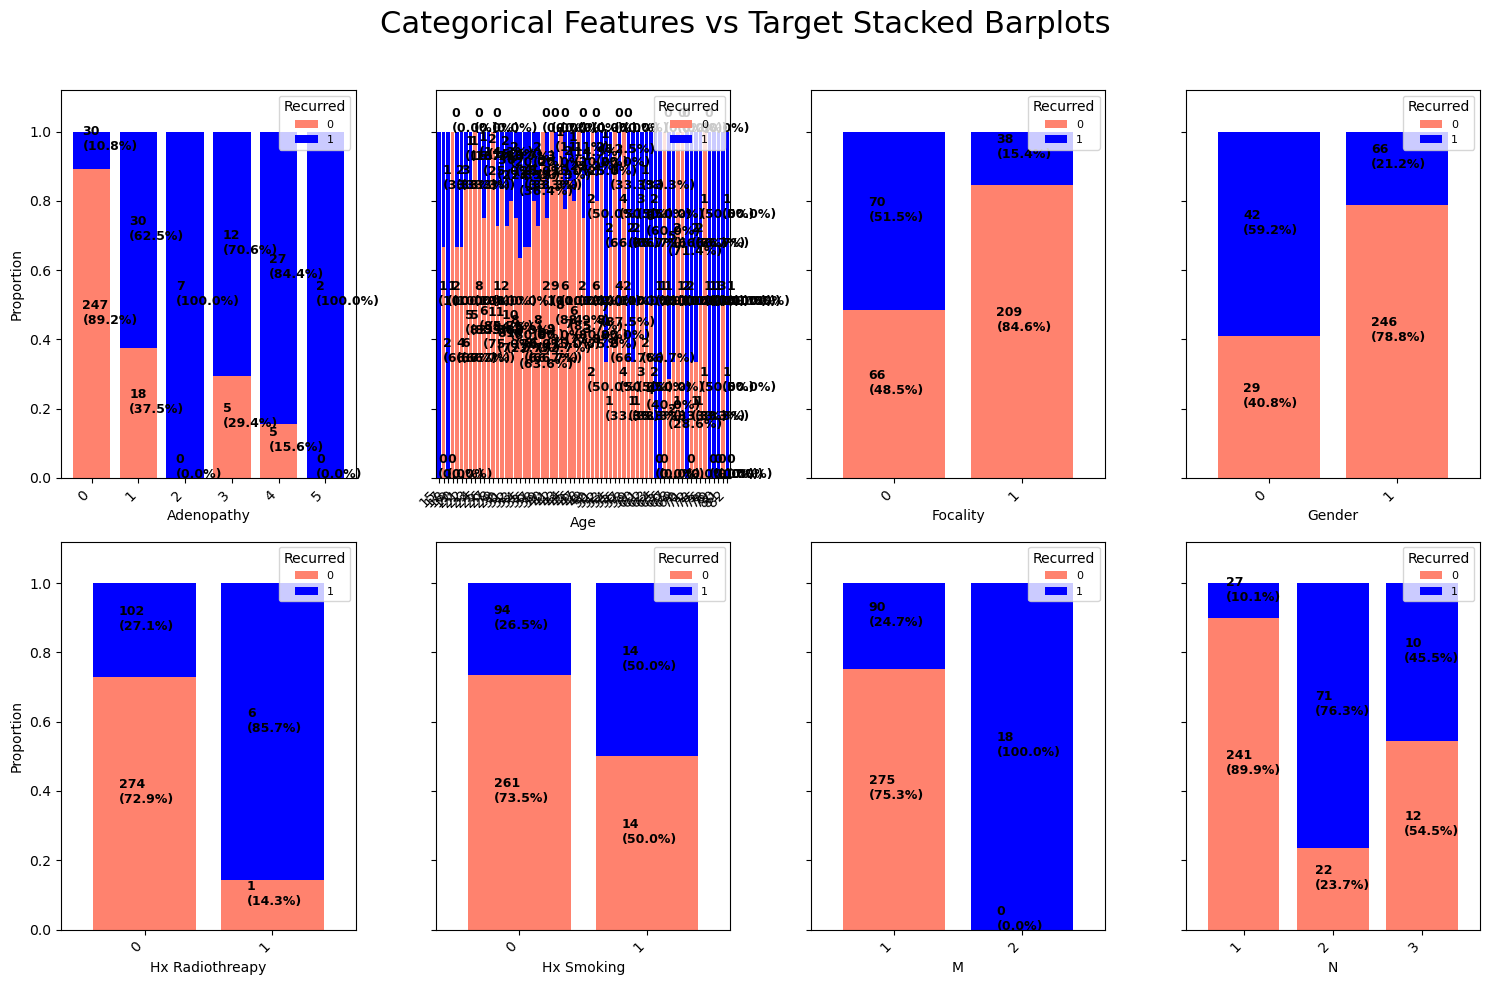

In [34]:
#Graphs showing categorial values V/S Target Stacked Barplots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Sample data
# df = your DataFrame
# categorical_features = list of categorical feature names

# Create a 2x4 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Print the shape of ax to confirm its dimensions
print("ax shape:", ax.shape)  # Should output (2, 4)

# Define colormap
cmp = ListedColormap(['#ff826e', 'blue'])

for i, col in enumerate(categorical_features):
    if i >= ax.size:
        break  # Prevent indexing errors if there are more features than subplots

    # Create a cross tabulation showing the proportion of Recurred for each category of the feature
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['Recurred'], normalize='index')
    cross_tab = pd.crosstab(index=df[col], columns=df['Recurred'])  # For counts

    # Plot stacked bar charts
    x, y = divmod(i, 4)  # Using divmod for indexing
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate(cross_tab.index):
        for proportion, count, y_location in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx - 0.2, y=(y_location - proportion) + (proportion / 2),
                         s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                         color="black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x, y].legend(title='Recurred', loc='upper right', fontsize=8, ncol=1)
    
    # Set y limit
    ax[x, y].set_ylim([0, 1.12])
    
    # Rotate xticks for better readability
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=45, ha='right')

# Set the overall title and layout
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top to make room for suptitle
plt.show()


    

In [38]:
#------------------------------------------------------->Decision Tree Model Building<--------------------------------------------------------------------
#Defining the base Decision Tree Model
dt_base = DecisionTreeClassifier(random_state=0)
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
   
#This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
#It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
#The combination with the highest recall for class 1 is selected as the default scoring metric. 
#The function returns the classifier with the optimal hyperparameters.
    
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_
    return clf_grid.best_estimator_, best_hyperparameters
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)
    

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
#------------------------------------------------------->Training & Testing<-----------------------------------------------------------------------------
print(classification_report(y_train, best_dt.predict(X_train)))
print(classification_report(y_train, best_dt.predict(X_train)))
print(classification_report(y_test, best_dt.predict(X_test)))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       220
           1       0.96      0.92      0.94        86

    accuracy                           0.97       306
   macro avg       0.97      0.95      0.96       306
weighted avg       0.97      0.97      0.97       306

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.95        77
weighted avg       0.96      0.96      0.96        77



In [40]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    return df

In [41]:
#Evalution of model
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.96,0.95,0.98,0.91,0.97,0.93,0.96,0.95,0.95,0.96


In [42]:

#------------------------------------------------------------>Random Forest Classifier Base Model<------------------------------------------------------

rf_base = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))
#Random Forest Classifier Base Model Definition


RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       220
           1       0.97      0.88      0.93        86

    accuracy                           0.96       306
   macro avg       0.97      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306



In [43]:
#Evalution of model
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.95,1.0,1.0,0.86,0.97,0.93,0.97,0.93,0.95,0.96


In [44]:
# Define the features (X) and the output labels (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

model_train_accuracy=accuracy_score(y_train,y_train_pred)
model_test_accuracy=accuracy_score(y_test,y_test_pred)
print("model_train_accuracy",model_train_accuracy)
print("model_test_accuracy",model_test_accuracy)

model_train_accuracy 1.0
model_test_accuracy 0.948051948051948


In [ ]:
#model_train_accuracy-->100%
#model_test_accuracy-->94.80%

In [45]:
#Building a Predictive System and checking the consistency of given input and output .
import numpy as np
import numpy as np

input_data=(30,	1,	0,	0,	0,	1,	3,	0,	1,	1,	1,	1,	1,	1,	1,	2	)


#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only an instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print("The person does not have a thyroid")
else :
    print("The person has thyroid")

[0]
The person does not have a thyroid


In [46]:
# Define the base KNN model and set up the pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [47]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [48]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}


In [49]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00        86

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306



In [50]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        55
           1       0.72      0.95      0.82        22

    accuracy                           0.88        77
   macro avg       0.85      0.90      0.87        77
weighted avg       0.91      0.88      0.89        77



In [29]:
#Evaluation of model
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.98,0.72,0.85,0.95,0.91,0.82,0.85,0.9,0.87,0.88


In [31]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.98,0.72,0.85,0.95,0.91,0.82,0.85,0.90,0.87,0.88
DT,0.96,0.95,0.98,0.91,0.97,0.93,0.96,0.95,0.95,0.96
RF,0.95,1.00,1.00,0.86,0.97,0.93,0.97,0.93,0.95,0.96


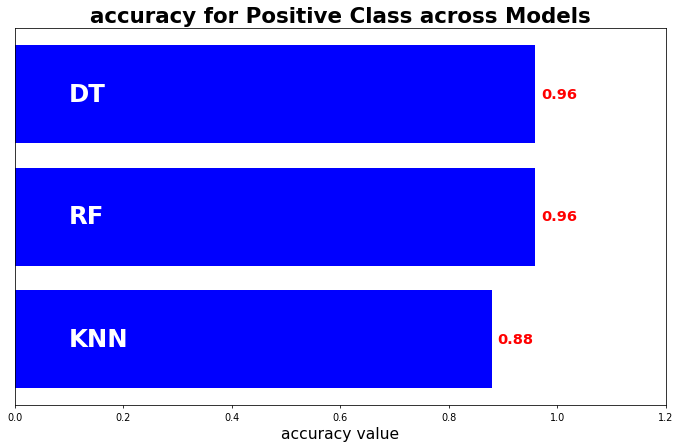

In [47]:
# Sort values based on 'recall_1'
results.sort_values(by='accuracy', ascending=True, inplace=True)
recall_1_scores = results['accuracy']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='blue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)
    # Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("accuracy for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('accuracy value', fontsize=16)
plt.show()

In [ ]:
#Accuracy of models
#Desicion_Tree-->96%
#Random_Forest-->96%
#KNN_Model-->88%